# Simple Linear Regression
Applying linear regression analysis to sample data from a `csv` file.
Scatterplots and Regplots are used to visualise the sample data from the 
independant and dependant variables, and the `statsmodel.api` library is 
used to provide regression analysis. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Read Data from CSV
Data from the `HDI.csv` file will be used for the analysis.

In [6]:
data = pd.read_csv('HDI.csv')
data.head()

,Country,Human Development Index,Mean Mathematics Performance Score
0,Norway,94.9,502
1,Australia,93.9,494
2,New Zealand,91.5,495
3,United States,92.0,470
4,Ireland,92.3,504


## Define Dependent and Independant Variables

In [7]:
x = data['Mean Mathematics Performance Score'] # Independent variable
y = data['Human Development Index'] # Dependent variable

## Generate Scatterplot Graph

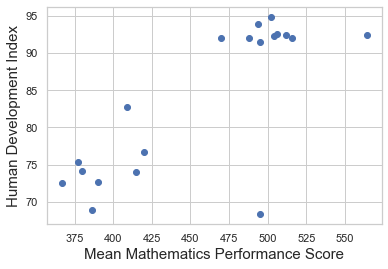

In [14]:
sns.set_theme(style="whitegrid")
plt.scatter(x,y)
plt.xlabel('Mean Mathematics Performance Score', fontsize = 15)
plt.ylabel('Human Development Index', fontsize = 15)
plt.show()

## Generate Regplot Graph

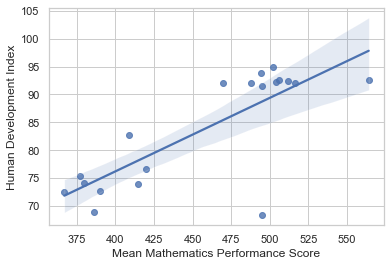

In [15]:
sns.regplot(data = data, x = 'Mean Mathematics Performance Score', y = 'Human Development Index')

## Regression Analysis

In [16]:
import warnings
warnings.filterwarnings('ignore') # Ignore the n>20 warning as the sample size is 19

x_c = sm.add_constant(x) # create constant value from x
results = sm.OLS(y,x_c).fit() # create OLS regression model
results.summary() # display results

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Human Development Index   R-squared:                       0.628
Model:                                 OLS   Adj. R-squared:                  0.606
Method:                      Least Squares   F-statistic:                     28.66
Date:                     Fri, 15 Jul 2022   Prob (F-statistic):           5.27e-05
Time:                             14:56:41   Log-Likelihood:                -60.877
No. Observations:                       19   AIC:                             125.8
Df Residuals:                           17   BIC:                             127.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 23.4251     11.364      2.061      0.055      -0.551      47.401
Mean Mathematics Performance Score     0.1319      0.025      5.353      0.000       0.080       0.184
==============================================================================
Omnibus:                       22.143   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.054
Skew:                          -2.003   Prob(JB):                     4.91e-07
Kurtosis:                       7.544   Cond. No.                     3.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Analysis

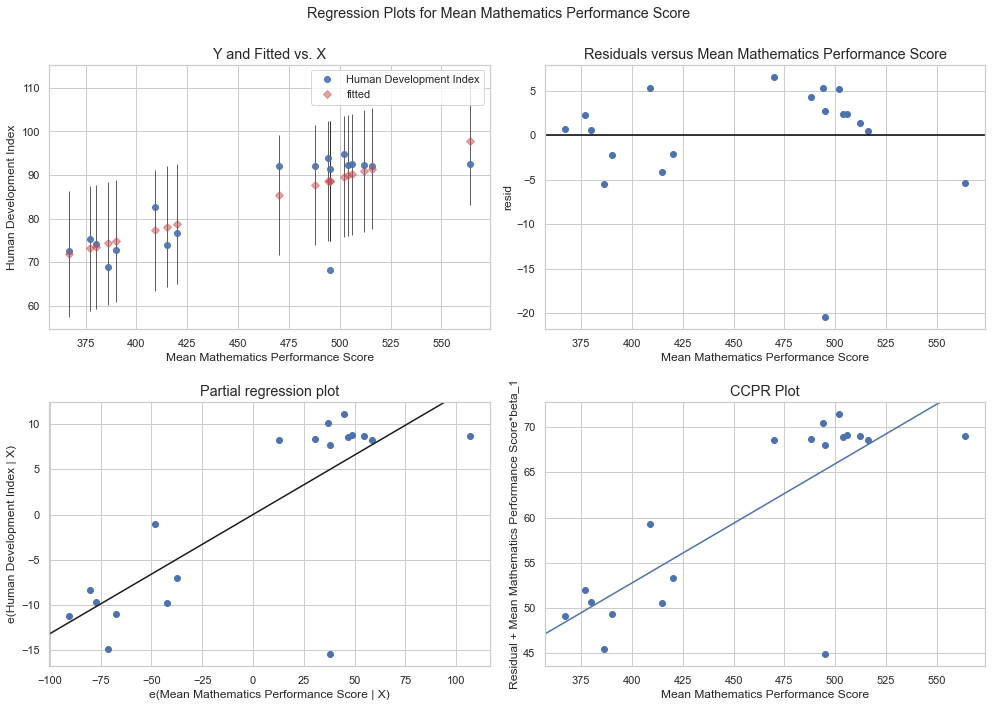

In [23]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(results, 'Mean Mathematics Performance Score', fig=fig)